<a href="https://colab.research.google.com/github/Bikash432/Bikash-Thapa-Magar/blob/master/movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.graph_objects as go # Plotly graph objects
import warnings # handle warning messages
warnings.filterwarnings('ignore') # Ignore warning messages

In [52]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [53]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [54]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 8807 rows and 12 columns


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [56]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

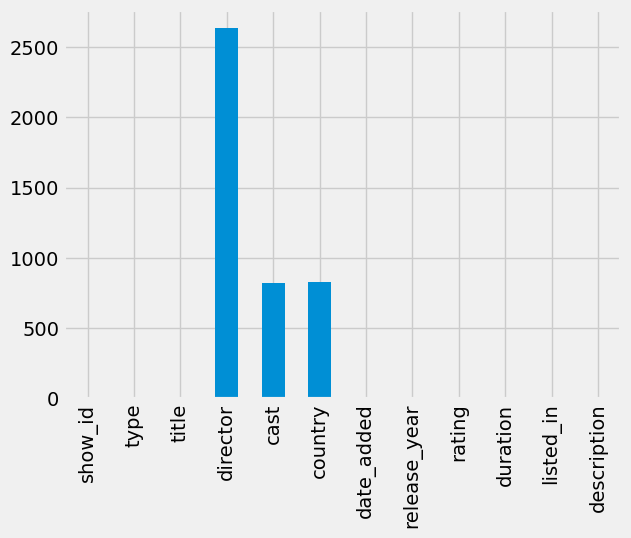

In [57]:
df.isnull().sum().plot(kind='bar')

In [58]:
# Remove missing values from the DataFrame
netflix=df.dropna()

# After removing missing values, check the data shape
print(f'The dataset contains {netflix.shape[0]} rows and {netflix.shape[1]} columns')

The dataset contains 5332 rows and 12 columns


In [59]:
# Checking the duplicate values in the data
duplicate_values=df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


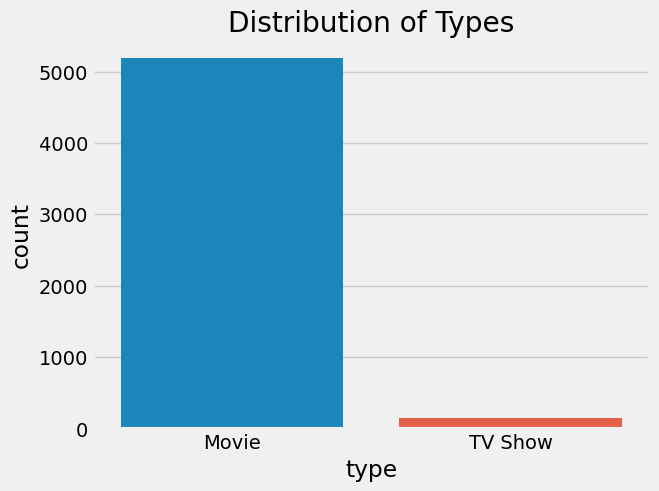

In [60]:
# Create a count plot for the 'type' column
sns.countplot(data=netflix, x='type')

# Set the title of the plot
plt.title('Distribution of Types')

# Display the plot
plt.show()

In [61]:
# Select rows where 'type' is 'Movie'
movie = netflix[netflix['type'] == 'Movie']

In [62]:
# Remove 'min' suffix from values in the 'duration' column and convert to integers
movie['duration'] = movie['duration'].str.replace(' min', '').astype(int)

In [63]:
# check data types of movie duration
print(movie['duration'].dtype)

int64


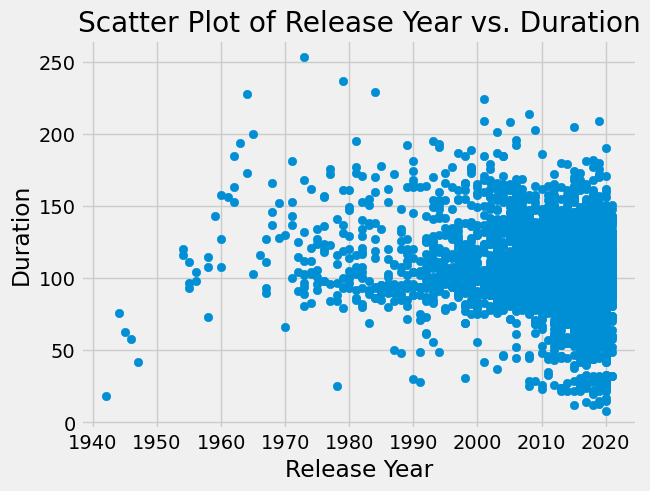

In [64]:
# Create a scatter plot of 'release_year' versus 'duration'
plt.scatter(movie['release_year'], movie['duration'])

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Scatter Plot of Release Year vs. Duration')

# Display the plot
plt.show()

In [65]:
# Find the index of the row with the minimum duration
min_duration_index = movie['duration'].idxmin()

# Get the corresponding release year and duration
corresponding_min_release_year = movie.loc[min_duration_index, 'release_year']
min_duration = movie.loc[min_duration_index, 'duration']

print(f"The movie with the minimum duration of {min_duration} minutes was released in the year {corresponding_min_release_year}.")

# Find the index of the row with the maximum duration
max_duration_index = movie['duration'].idxmax()

# Get the corresponding release year and duration
corresponding_max_release_year = movie.loc[max_duration_index, 'release_year']
max_duration = movie.loc[max_duration_index, 'duration']

print(f"The movie with the maximum duration of {max_duration} minutes was released in the year {corresponding_max_release_year}.")

The movie with the minimum duration of 8 minutes was released in the year 2020.
The movie with the maximum duration of 253 minutes was released in the year 1973.


In [66]:
# Count the occurrences of each unique entry in the 'listed_in' column
genre_counts = movie['listed_in'].value_counts()

# Display the genre counts
print("Genre Counts:")
print(genre_counts)

Genre Counts:
Dramas, International Movies                                        336
Stand-Up Comedy                                                     286
Comedies, Dramas, International Movies                              257
Dramas, Independent Movies, International Movies                    243
Children & Family Movies, Comedies                                  179
                                                                   ... 
Action & Adventure, Children & Family Movies, Independent Movies      1
LGBTQ Movies, Thrillers                                               1
Sci-Fi & Fantasy                                                      1
Children & Family Movies, Comedies, Cult Movies                       1
Cult Movies, Dramas, Thrillers                                        1
Name: listed_in, Length: 268, dtype: int64


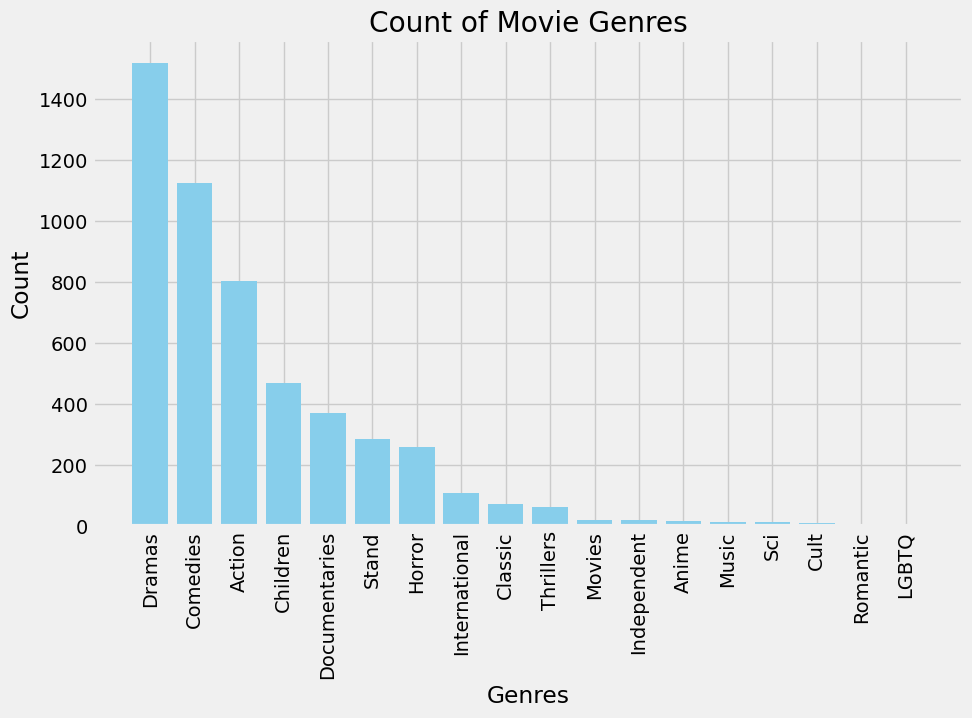

In [67]:
# Extract genres from the 'listed_in' column
movie['genres'] = movie['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)

# Count the occurrences of each genre
genre_counts_movie = movie['genres'].value_counts().reset_index()

# Rename the columns to 'genre' and 'count'
genre_counts_movie.columns = ['genre', 'count']

# Create a bar plot of genre counts
plt.figure(figsize=(10, 6))
plt.bar(genre_counts_movie['genre'], genre_counts_movie['count'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Movie Genres')
plt.xticks(rotation=90)
plt.show()

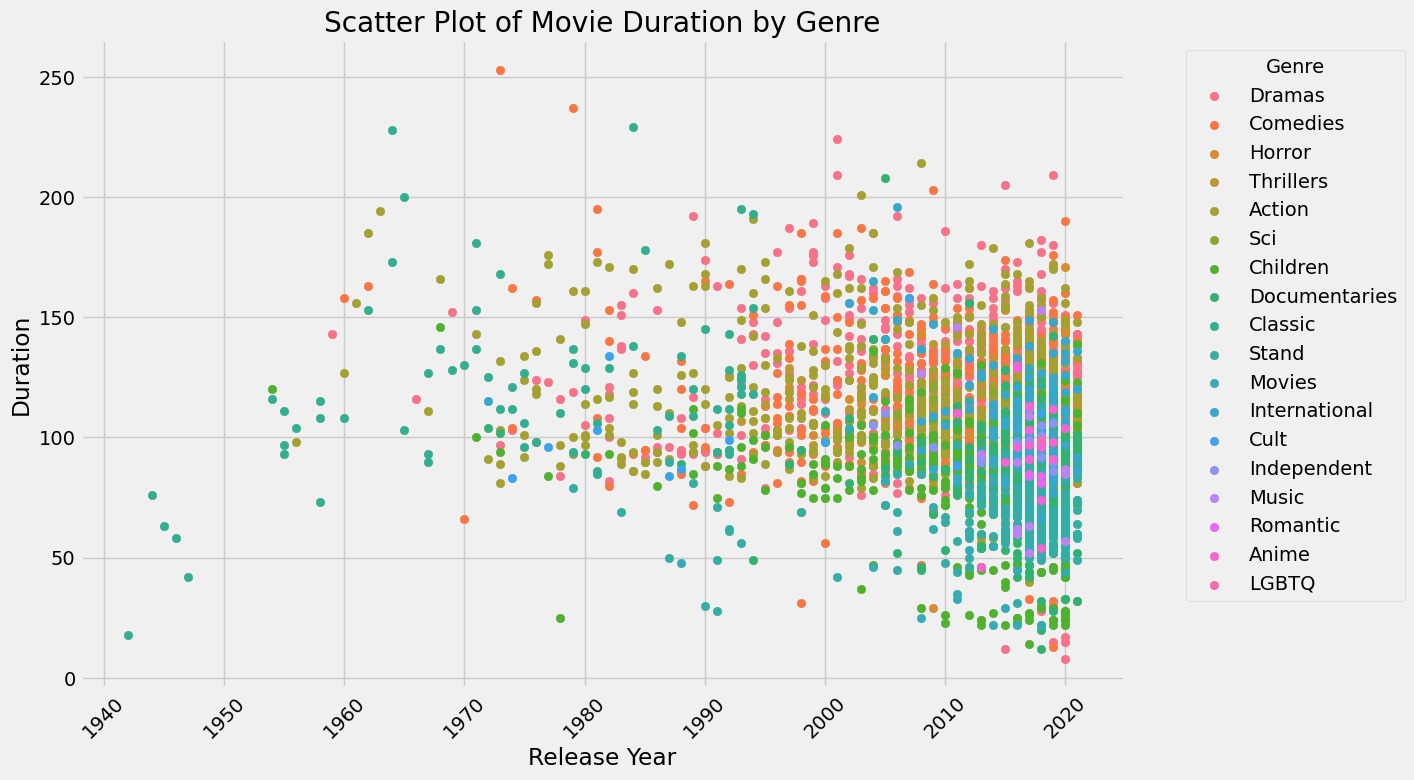

In [68]:
# Apply the 'fivethirtyeight' style
plt.style.use('fivethirtyeight')

# Create a color palette for each unique genre
palette = sns.color_palette("husl", len(movie['genres'].unique()))

# Create scatter plot with different colors for each genre
plt.figure(figsize=(12, 8))  # Increase the figure size here
for i, genre in enumerate(movie['genres'].unique()):
    plt.scatter(movie['release_year'][movie['genres'] == genre],
                movie['duration'][movie['genres'] == genre],
                label=genre,
                color=palette[i])

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Scatter Plot of Movie Duration by Genre')
plt.xticks(rotation=45)

# Position the legend outside the plot area
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


In [69]:
movie['rating'].value_counts()

TV-MA       1741
TV-14       1177
R            778
PG-13        470
TV-PG        416
PG           275
TV-G          81
TV-Y          71
TV-Y7         70
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: rating, dtype: int64

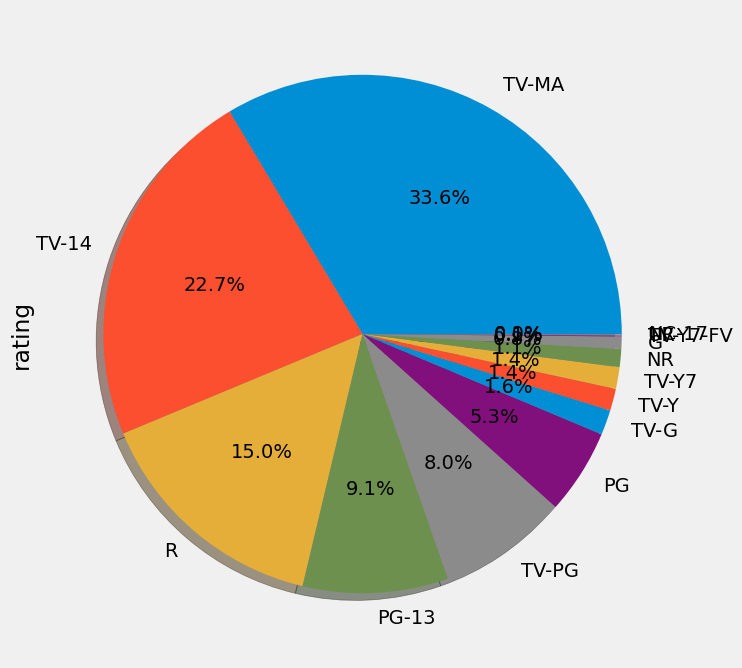

In [70]:
# Plot a pie chart to visualize the distribution of movie ratings
movie['rating'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Add percentage labels to each wedge
    shadow=True,  # Add shadow effect to the pie chart
    figsize=(10, 8)  # Set the size of the figure
)

# Display the pie chart
plt.show()

In [71]:
movie.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
genres          0
dtype: int64

In [72]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [73]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [74]:
df.isnull().sum()   

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [75]:
# df = df.dropna(axis=0)

In [76]:
df.isnull().sum()   


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [77]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [78]:
df.shape

(8807, 12)

In [79]:
# Assuming df is your DataFrame
df['show_id'] = df['show_id'].str.replace('s', '')

# Print the updated DataFrame
print(df)


     show_id     type                  title         director  \
0          1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1          2  TV Show          Blood & Water              NaN   
2          3  TV Show              Ganglands  Julien Leclercq   
3          4  TV Show  Jailbirds New Orleans              NaN   
4          5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802    8803    Movie                 Zodiac    David Fincher   
8803    8804  TV Show            Zombie Dumb              NaN   
8804    8805    Movie             Zombieland  Ruben Fleischer   
8805    8806    Movie                   Zoom     Peter Hewitt   
8806    8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [80]:
df['tags']=df['description'] +df['listed_in']  
# +df['director'] +df['cast'] +df['country']  

In [81]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tags
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...","As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,In a city of coaching centers known to train I...


In [82]:
new_df = df.drop(columns=['type','rating', 'duration', 'listed_in', 'description', 'director', 'cast', 'country',  'date_added', 'release_year'])

In [83]:
new_df.head(10)

,show_id,title,tags
0,1,Dick Johnson Is Dead,"As her father nears the end of his life, filmm..."
1,2,Blood & Water,"After crossing paths at a party, a Cape Town t..."
2,3,Ganglands,To protect his family from a powerful drug lor...
3,4,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo..."
4,5,Kota Factory,In a city of coaching centers known to train I...
5,6,Midnight Mass,The arrival of a charismatic young priest brin...
6,7,My Little Pony: A New Generation,Equestria's divided. But a bright-eyed hero be...
7,8,Sankofa,"On a photo shoot in Ghana, an American model s..."
8,9,The Great British Baking Show,A talented batch of amateur bakers face off in...
9,10,The Starling,A woman adjusting to life after a loss contend...


# Feature Selection


In [84]:
from sklearn.feature_extraction.text import CountVectorizer

In [85]:
cv =CountVectorizer(max_features=10000, stop_words='english')

In [86]:
cv


CountVectorizer(max_features=10000, stop_words='english')

In [87]:
vector = cv.fit_transform(new_df['tags'].values.astype('U')).toarray()

In [88]:
vector.shape

(8807, 10000)

In [89]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity



# # Compute TF-IDF vectors
# vectorizer = TfidfVectorizer()
# tfidf_matrix = vectorizer.fit_transform(new_df['tags'])

# # Compute cosine similarity matrix
# cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# # Function to recommend similar items
# def recommend(title, cosine_sim=cosine_sim):
#     # Get index of the movie title
#     idx = new_df[new_df['title'] == title].index[0]

#     # Get similarity scores of the movie with all other movies
#     sim_scores = list(enumerate(cosine_sim[idx]))

#     # Sort movies based on the similarity scores
#     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

#     # Get top 5 similar movies
#     sim_scores = sim_scores[1:6]

#     # Get movie indices
#     movie_indices = [i[0] for i in sim_scores]

#     # Return top 5 similar movies
#     return new_df['title'].iloc[movie_indices]

# # Example usage
# recommended_movies = recommend("Jaws")
# print("Recommended movies for 'Jaws':")
# print(recommended_movies)


In [90]:
from sklearn.metrics.pairwise import cosine_similarity

In [91]:
similarity = cosine_similarity(vector)

In [92]:
similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.06085806,
        0.        ],
       [0.        , 1.        , 0.39477102, ..., 0.        , 0.        ,
        0.08451543],
       [0.        , 0.39477102, 1.        , ..., 0.        , 0.0410305 ,
        0.07784989],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12171612,
        0.05773503],
       [0.06085806, 0.        , 0.0410305 , ..., 0.12171612, 1.        ,
        0.10540926],
       [0.        , 0.08451543, 0.07784989, ..., 0.05773503, 0.10540926,
        1.        ]])

In [93]:
def recommend(movie_title):
    index = new_df[new_df['title'] == movie_title].index
    if len(index) == 0:
        print("Movie not found.")
        return
    index = index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommended_movies = []
    for i in distance:
        movie_index = i[0]
        if new_df.iloc[movie_index]['title'] != movie_title:  # Exclude the same movie
            recommended_movies.append(new_df.iloc[movie_index]['title'])
            if len(recommended_movies) == 5:  # Recommend top 5 similar movies
                break
    for movie in recommended_movies:
        print(movie)


In [94]:
recommend("Jaws")

Jaws: The Revenge
Jaws 2
Jaws 3
Saladin
The Great Gambler


In [95]:
jaws_titles = new_df[new_df['title'].str.contains("Jaws", case=False)]
print(jaws_titles)

   show_id              title  \
41      42               Jaws   
42      43             Jaws 2   
43      44             Jaws 3   
44      45  Jaws: The Revenge   

                                                 tags  
41  When an insatiable great white shark terrorize...  
42  Four years after the last deadly shark attacks...  
43  After the staff of a marine theme park try to ...  
44  After another deadly shark attack, Ellen Brody...  


In [96]:
import pickle


In [97]:
pickle.dump(new_df, open('movies_list.pkl', 'wb'))


In [98]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [99]:
pickle.load(open('movies_list.pkl', 'rb'))


,show_id,title,tags
0,1,Dick Johnson Is Dead,"As her father nears the end of his life, filmm..."
1,2,Blood & Water,"After crossing paths at a party, a Cape Town t..."
2,3,Ganglands,To protect his family from a powerful drug lor...
3,4,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo..."
4,5,Kota Factory,In a city of coaching centers known to train I...
...,...,...,...
8802,8803,Zodiac,"A political cartoonist, a crime reporter and a..."
8803,8804,Zombie Dumb,"While living alone in a spooky town, a young g..."
8804,8805,Zombieland,Looking to survive in a world taken over by zo...
8805,8806,Zoom,"Dragged from civilian life, a former superhero..."
